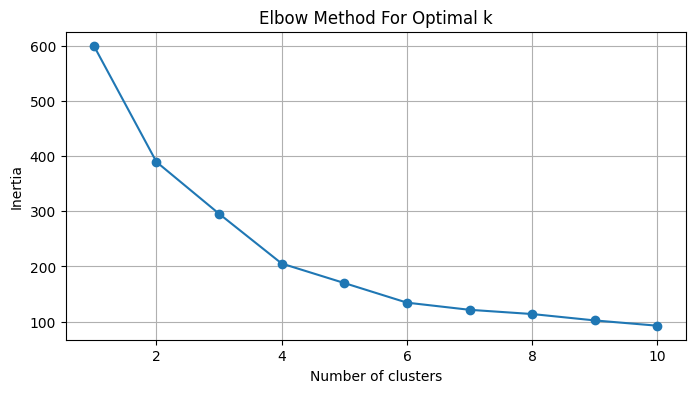

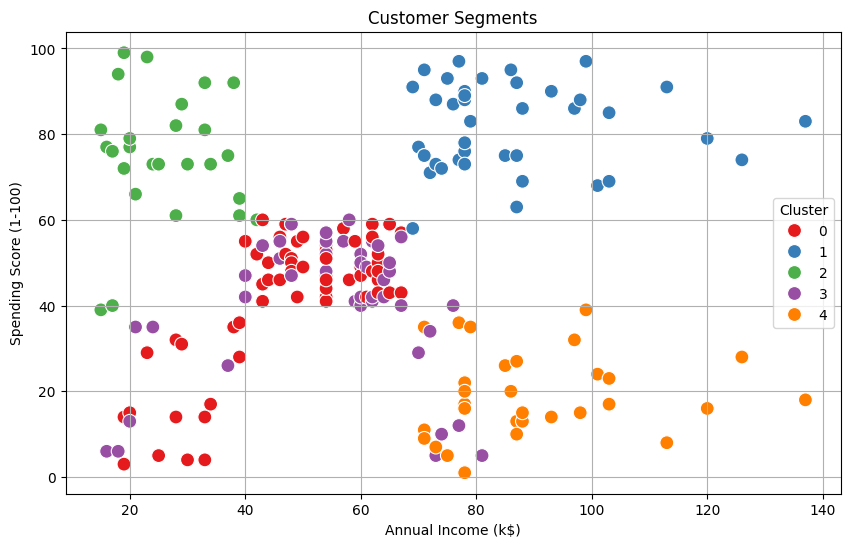

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Mall_Customers.csv')  


df_clean = df.drop(['CustomerID'], axis=1)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})


features = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


df['Cluster'] = df_clean['Cluster']
print(df.head())
